In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
%matplotlib  inline

In [78]:
df_insurance=pd.read_csv("/Users/mac/Desktop/Npower Course /Data_Visualiazition /To_github/insurance.csv")

In [58]:
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [59]:
df_insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [60]:
df_insurance.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [61]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [62]:
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [63]:
from sklearn.preprocessing import StandardScaler


In [5]:
scaler = StandardScaler()

In [79]:
df_insurance["charges_scaled"]= scaler.fit_transform(df_insurance[['charges']])

In [80]:
df_insurance.head()

age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   charges_scaled  
0        0.298584  
1       -0.953689  
2       -0.728675  
3        0.719843  
4       -0.776802

#### Bmi is measurement used to categorize weight status according to ranges, typically:

    * Underweight: BMI < 18.5
    * Normal weight: BMI 18.5–24.9
    * Overweight: BMI 25–29.9
    * Obesity: BMI ≥ 30
    def weight_status_fun(df):
    # Define the conditions
    df['weight_status'] = 'Unknown'  # Default value for safety
    
    df.loc[df['bmi'] < 18.5, 'weight_status'] = 'UnderWeight'
    df.loc[(df['bmi'] >= 18.5) & (df['bmi'] < 24.9), 'weight_status'] = 'NormalWeight'
    df.loc[(df['bmi'] >= 25) & (df['bmi'] < 29.9), 'weight_status'] = 'OverWeight'
    df.loc[df['bmi'] >= 30, 'weight_status'] = 'Obesity'
    
    return df

In [81]:
def get_weight_status(bmi):
    if bmi < 18.5:
        return 'UnderWeight'
    elif 18.5 <= bmi < 24.9:
        return 'NormalWeight'
    elif 25 <= bmi < 29.9:
        return 'OverWeight'
    else:  # bmi >= 30
        return 'Obesity'  

In [82]:
df_insurance["weight_status"]=df_insurance["bmi"].apply(get_weight_status)

In [9]:
df_insurance.head()

age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   charges_scaled weight_status  
0        0.298584    OverWeight  
1       -0.953689       Obesity  
2       -0.728675       Obesity  
3        0.719843  NormalWeight  
4       -0.776802    OverWeight

In [54]:
df_insurance=df_insurance['charges'].round(1)

0       16884.9
1        1725.6
2        4449.5
3       21984.5
4        3866.9
         ...   
1333    10600.5
1334     2206.0
1335     1629.8
1336     2007.9
1337    29141.4
Name: charges, Length: 1338, dtype: float64

In [55]:
help(round)

Help on built-in function round in module builtins:

round(number, ndigits=None)
    Round a number to a given precision in decimal digits.
    
    The return value is an integer if ndigits is omitted or None.  Otherwise
    the return value has the same type as the number.  ndigits may be negative.



In [83]:
df_insurance

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      charges_scaled weight_status  
0           0.298584    OverWeight  
1          -0.953689       Obesity  
2          -0.728675       Obesity  
3           0.719843  NormalWeight  
4          -0.776802    OverWeight  
...              ...           ...  
1333       -0.220551       Obesity  
1334       -0.914002       Obesity  
1335       -0.961596       Obesity  
1336       -0.930362    OverWeight  
1337        1.311053    OverWeight  

[1338 rows x 9 columns]

In [84]:
df_insurance["charges_thounds"]=df_insurance["charges"]/1000
df_insurance['charges_thounds']=df_insurance['charges'].round(1)

In [ ]:
df_insurance.head()

age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   charges_scaled weight_status  charges_thounds  
0        0.298584    OverWeight          16884.9  
1       -0.953689       Obesity           1725.6  
2       -0.728675       Obesity           4449.5  
3        0.719843  NormalWeight          21984.5  
4       -0.776802    OverWeight           3866.9

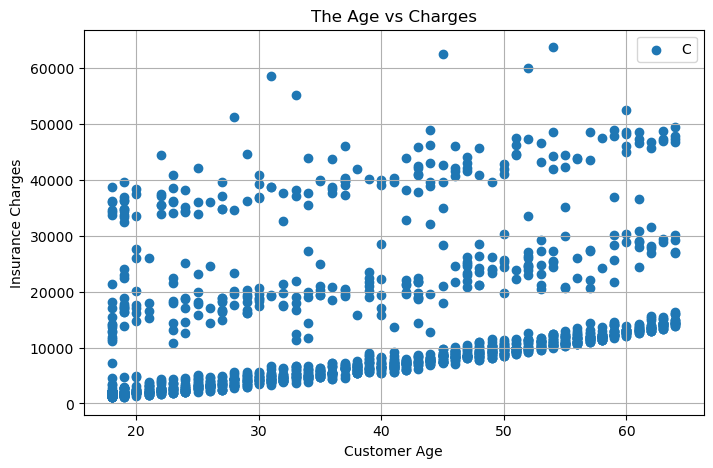

In [175]:
fig , ax =plt.subplots(figsize=(8, 5))
ax.scatter(df_insurance['age'],df_insurance['charges'],label='Customers')
ax.set_title("The Age vs Charges")
ax.set_ylabel("Insurance Charges")
ax.set_xlabel("Customer Age")
#plt.legend("Customers")
#plt.legend(loc= 'upper left', bbox_to_anchor=(0.85,1))
plt.grid(True)
plt.show()

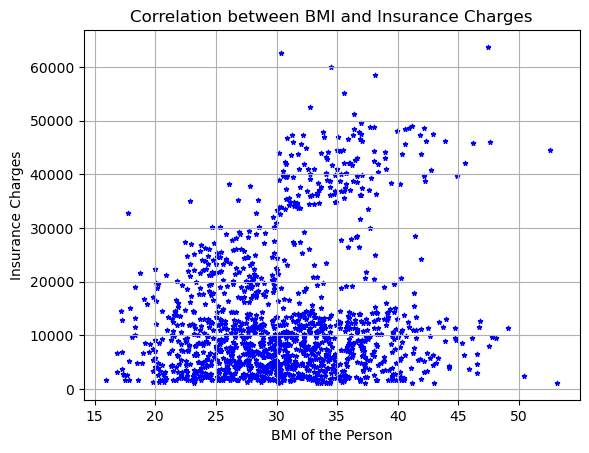

In [131]:
#using matplotlib library scatter plot to investgate the corrleation betwen BMI variable and 
#Charges
plt.scatter(df_insurance['bmi'],df_insurance['charges'], color='blue',marker='*',s=10)
plt.title('Correlation between BMI and Insurance Charges')
plt.xlabel('BMI of the Person')
plt.ylabel('Insurance Charges')
plt.grid(True)
plt.show()

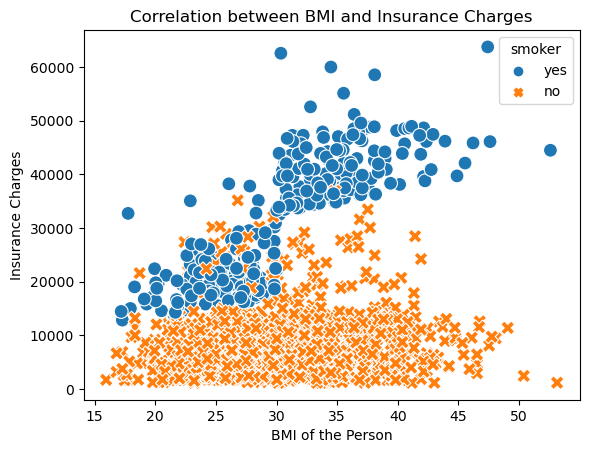

In [133]:
#using Seaborn library scatter plot to investgate the corrleation betwen BMI variable and 
#Charges in compiste with customer age
sns.scatterplot(x='bmi',y='charges',data=df_insurance,hue='smoker', style='smoker', s=100)
plt.title('Correlation between BMI and Insurance Charges')
plt.xlabel('BMI of the Person')
plt.ylabel('Insurance Charges')
#plt.grid(True)
plt.show()

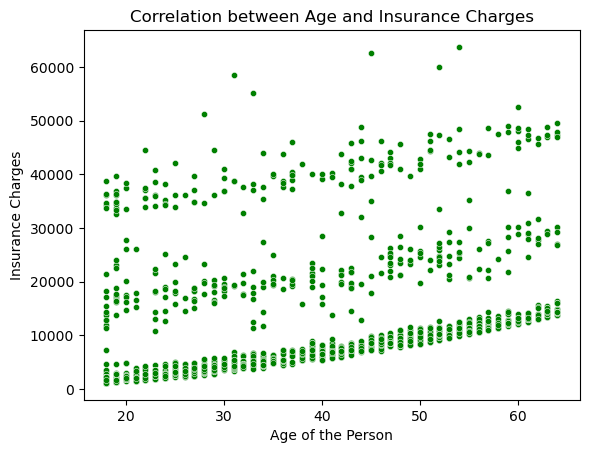

In [136]:
#using Seaborn library scatter plot to investgate the corrleation betwen Age variable and 
#Charges in compiste with customer age
sns.scatterplot(x='age', y='charges',data=df_insurance,marker='o', s=20, color='green')
plt.title('Correlation between Age and Insurance Charges')
plt.xlabel('Age of the Person')
plt.ylabel('Insurance Charges')
#plt.grid(True)
plt.show()

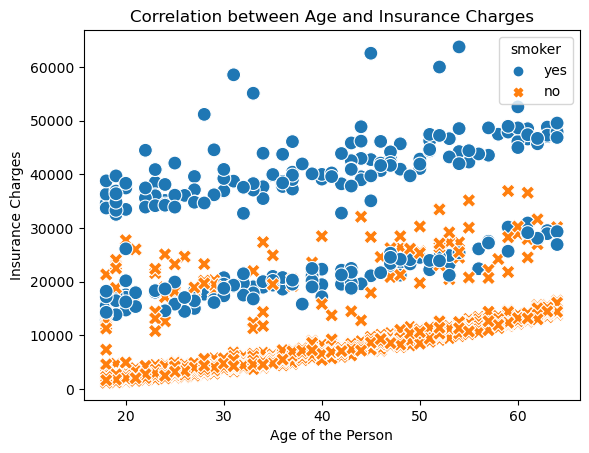

In [138]:
#using Seaborn library scatter plot to investgate the corrleation betwen Age variable and 
#Charges in compiste with customer age
sns.scatterplot(x='age',y='charges',data=df_insurance,hue='smoker', style='smoker', s=100)
plt.title('Correlation between Age and Insurance Charges')
plt.xlabel('Age of the Person')
plt.ylabel('Insurance Charges')
#plt.grid(True)
plt.show()

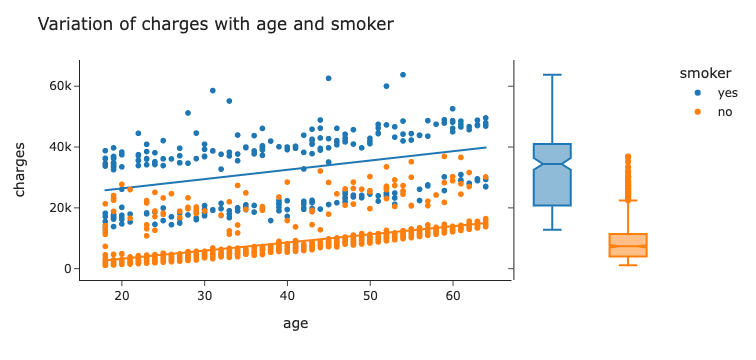

In [184]:
fig = px.scatter(df_insurance, x="age", y="charges", color="smoker",
           marginal_y="box", trendline="ols", template="simple_white")
fig.update_layout(title = "Variation of charges with age and smoker")
fig.show()

In [142]:
#bluiding waffle-Chart :
import matplotlib.patches as mpatches
from pywaffle import Waffle

In [143]:
total_chargers = df_insurance['charges'].sum()

In [144]:
value=df_insurance['region'].value_counts()

In [193]:
df_insurance_region.head()

charges_thounds  proportion  Number of tiles
region                                                 
northeast        4343668.9    0.244633               98
northwest        4035712.5    0.227289               91
southeast        5363689.6    0.302081              121
southwest        4012754.1    0.225996               90

In [52]:
value

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [192]:
waffle_chart.set_labels(['southeast','southwest','northwest','northeast'])
plt.figure(
FigureClass = Waffle,
rows = 10,
columns = 10,
values = value,
#title = {"label": "Cargeorical", "loc": "right", "size: 15}
legend = {'label':label,'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()
                   

AttributeError: 'numpy.ndarray' object has no attribute 'set_labels'

In [207]:
df_insurance_region=df_insurance.groupby('region')['charges_thounds'].sum().reset_index()


In [208]:
df_insurance_region.rename(columns={'charges_thounds':'total_charges_regions'},inplace=True)

In [209]:
df_insurance_region.head()

region  total_charges_regions
0  northeast              4343668.9
1  northwest              4035712.5
2  southeast              5363689.6
3  southwest              4012754.1

In [210]:
total_charges = df_insurance_region['total_charges_regions'].sum()

In [211]:
total_chargers

17755824.990759

In [215]:
df_insurance_region['proportion'] = df_insurance_region['total_charges_regions'] / total_charges

In [216]:
df_insurance_region

region  total_charges_regions  proportion
0  northeast              4343668.9    0.244633
1  northwest              4035712.5    0.227289
2  southeast              5363689.6    0.302081
3  southwest              4012754.1    0.225996

In [91]:
df_insurance_region.dtypes

region              object
charges_thounds    float64
dtype: object

In [103]:
#defining the size of the waffle
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


In [105]:
# compute the number of tiles for each category
tiles_per_category = (df_insurance_region['proportion'] * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

Number of tiles
0               98
1               91
2              121
3               90

In [106]:
df_insurance_region['Number of tiles']=tiles_per_category

In [107]:
df_insurance_region

region  charges_thounds  proportion  Number of tiles
0  northeast        4343668.9    0.244633               98
1  northwest        4035712.5    0.227289               91
2  southeast        5363689.6    0.302081              121
3  southwest        4012754.1    0.225996               90

In [118]:
df_insurance_region.set_index('region', inplace=True)

In [119]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


<Figure size 640x480 with 0 Axes>

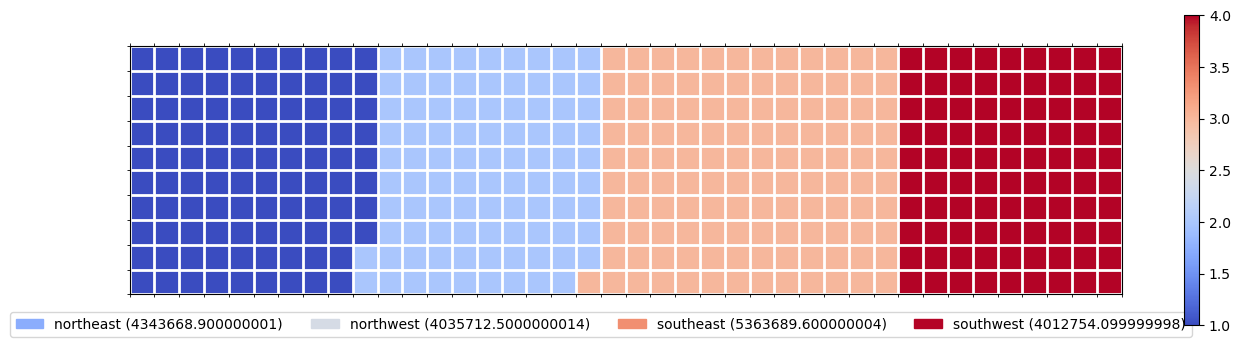

In [121]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_insurance_region['charges_thounds'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_insurance_region.index.values):
    label_str = category + ' (' + str(df_insurance_region['charges_thounds'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_insurance_region.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()


In [ ]:
df_insurance_region

In [177]:
ax1= fig.add_subplot(2,2,1)
#add code for plot 1


In [ ]:
ax2= fig.add_subplot(2,2,2)
#add code for plot 2

In [ ]:
ax3=fig.add_subplot(2,2,3)
#add code for plot 3

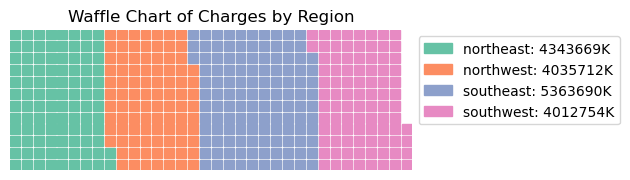

In [200]:
from pywaffle import Waffle
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    'charges_thounds': [4343668.9, 4035712.5, 5363689.6, 4012754.1],
    'proportion': [0.244633, 0.227289, 0.302081, 0.225996],
    'Number of tiles': [98, 91, 121, 90]
}
index = ['northeast', 'northwest', 'southeast', 'southwest']
df = pd.DataFrame(data, index=index)

# Prepare data for waffle chart
values = df['Number of tiles'].to_dict()
labels = [f"{region}: {charges:.0f}K" for region, charges in zip(df.index, df['charges_thounds'])]

# Create the waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=12,  # Adjust rows to fit the total number of tiles (e.g., 12 rows for better visualization)
    values=values,
    labels=labels,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

# Set the title directly on the axes
ax = plt.gca()  # Get current axes
ax.set_title('Waffle Chart of Charges by Region')

# Show the plot
plt.show()
